In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter


In [ ]:
fraud_train = pd.read_csv('/content/fraudTrain.csv')
fraud_test = pd.read_csv('/content/fraudTest.csv')

In [ ]:
fraud_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
fraud_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0


In [ ]:
print(fraud_test.shape)
print(fraud_train.shape)

(166940, 23)
(163106, 23)


In [ ]:
fraud_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
fraud_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166940 entries, 0 to 166939
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             166940 non-null  int64  
 1   trans_date_trans_time  166940 non-null  object 
 2   cc_num                 166940 non-null  int64  
 3   merchant               166940 non-null  object 
 4   category               166940 non-null  object 
 5   amt                    166940 non-null  float64
 6   first                  166940 non-null  object 
 7   last                   166940 non-null  object 
 8   gender                 166940 non-null  object 
 9   street                 166940 non-null  object 
 10  city                   166940 non-null  object 
 11  state                  166940 non-null  object 
 12  zip                    166940 non-null  int64  
 13  lat                    166940 non-null  float64
 14  long                   166940 non-nu

In [ ]:
fraud_test.info()
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166940 entries, 0 to 166939
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             166940 non-null  int64  
 1   trans_date_trans_time  166940 non-null  object 
 2   cc_num                 166940 non-null  int64  
 3   merchant               166940 non-null  object 
 4   category               166940 non-null  object 
 5   amt                    166940 non-null  float64
 6   first                  166940 non-null  object 
 7   last                   166940 non-null  object 
 8   gender                 166940 non-null  object 
 9   street                 166940 non-null  object 
 10  city                   166940 non-null  object 
 11  state                  166940 non-null  object 
 12  zip                    166940 non-null  int64  
 13  lat                    166940 non-null  float64
 14  long                   166940 non-nu

<ipython-input-10-cdbcb2d1b64a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud_train.corr(), annot=True)


<Axes: >

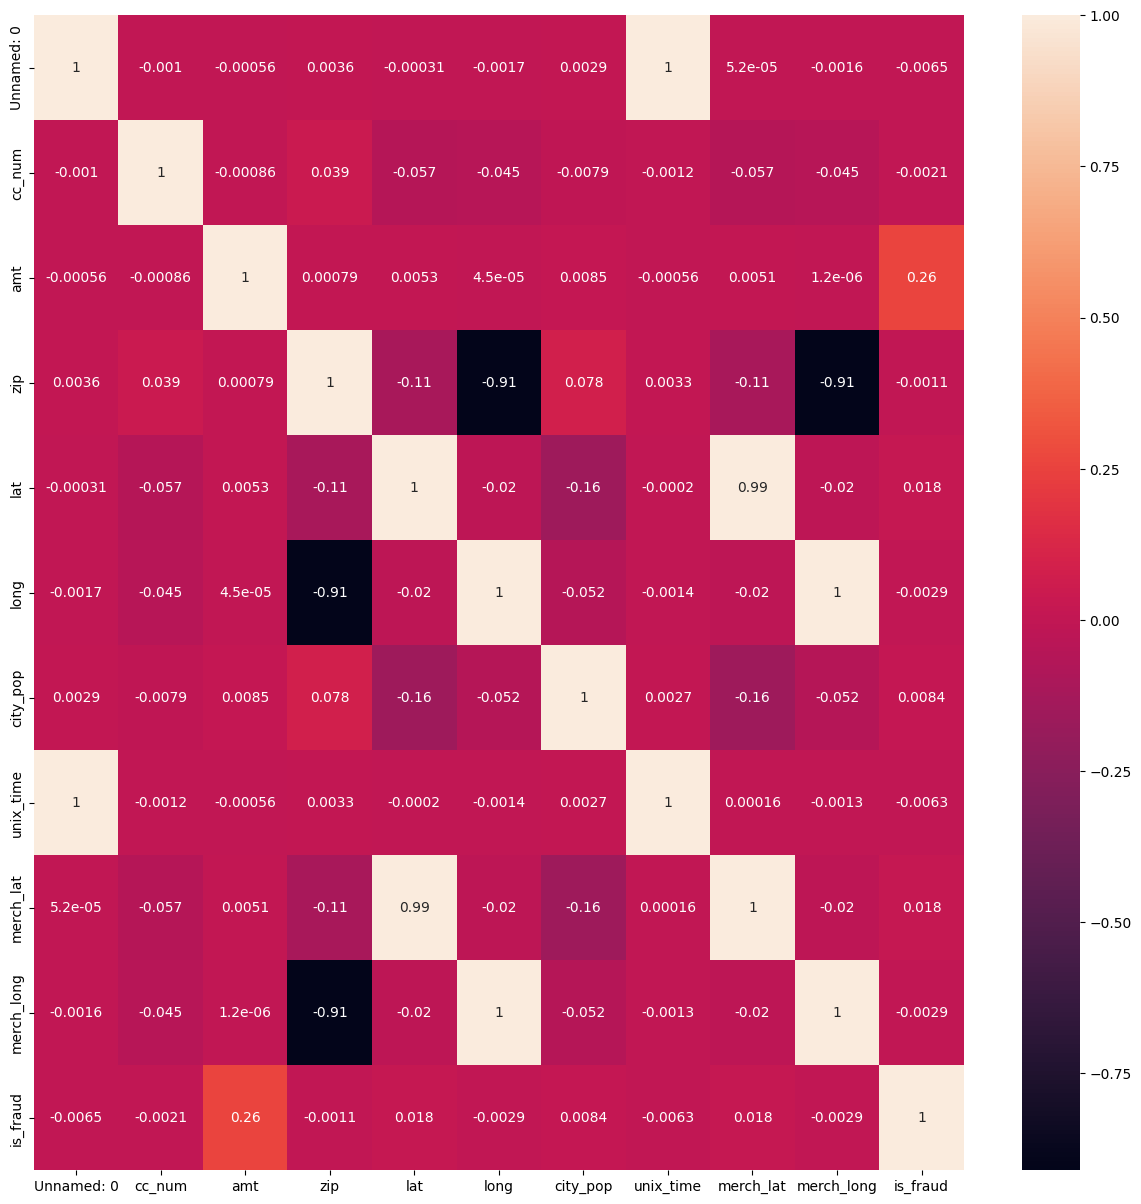

In [ ]:

plt.figure(figsize=(15,15))
sns.heatmap(fraud_train.corr(), annot=True)

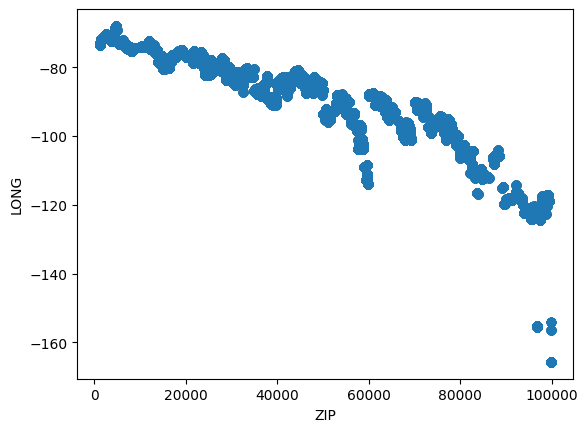

In [ ]:
plt.scatter(fraud_train["zip"], fraud_train["long"])
plt.xlabel("ZIP")
plt.ylabel("LONG")
plt.show()

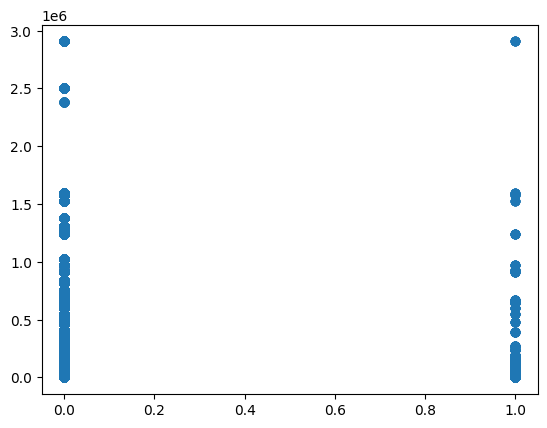

In [ ]:
plt.scatter(fraud_train["is_fraud"], fraud_train["city_pop"])

In [ ]:
fraud_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
fig = px.pie(values = fraud_train['is_fraud'].value_counts(), names=["Genuine", "Fraud"], width=700, height=400, color_discrete_sequence=["skyblue", "black"], title="Fraud vs Genuine transactions")
fig.show()

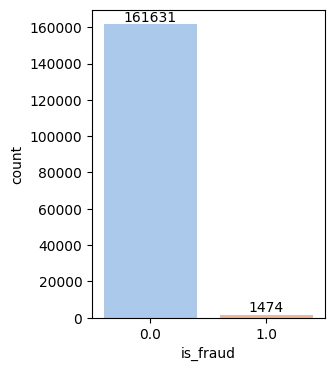

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='is_fraud', data=fraud_train, palette="pastel")
for i in ax.containers:
  ax.bar_label(i,)


In [ ]:
print('Genuine:', round(fraud_train['is_fraud'].value_counts()[0]/len(fraud_train)*100,2), '% of the dataset')
print('Frauds:', round(fraud_train['is_fraud'].value_counts()[1]/len(fraud_train) * 100,2), '% of the dataset')

Genuine: 99.1 % of the dataset
Frauds: 0.9 % of the dataset


In [ ]:
fraud_train.info()
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163106 entries, 0 to 163105
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             163106 non-null  int64  
 1   trans_date_trans_time  163106 non-null  object 
 2   cc_num                 163106 non-null  int64  
 3   merchant               163106 non-null  object 
 4   category               163106 non-null  object 
 5   amt                    163106 non-null  float64
 6   first                  163106 non-null  object 
 7   last                   163106 non-null  object 
 8   gender                 163106 non-null  object 
 9   street                 163106 non-null  object 
 10  city                   163106 non-null  object 
 11  state                  163106 non-null  object 
 12  zip                    163106 non-null  int64  
 13  lat                    163106 non-null  float64
 14  long                   163106 non-nu

In [ ]:
fraud_train.isnull().sum()
fraud_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
drop_columns = ['Unnamed: 0', 'cc_num', 'merchant', 'trans_num', 'unix_time', 'first', 'last', 'street', 'zip']
fraud_train.drop(columns=drop_columns, inplace=True)
fraud_test.drop(columns=drop_columns, inplace=True)

In [ ]:
fraud_train.shape

(163106, 14)

In [ ]:
fraud_test.shape

(166940, 14)

In [ ]:
fraud_train

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163101,2019-03-27 16:24:19,food_dining,31.37,M,New Holstein,WI,43.9446,-88.0911,5196,Child psychotherapist,1978-01-22,43.241563,-87.221069,0.0
163102,2019-03-27 16:24:26,home,79.80,F,Baton Rouge,LA,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,30.976654,-90.728379,0.0
163103,2019-03-27 16:27:38,shopping_net,1.01,F,Hooper,NE,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,41.248426,-97.313236,0.0
163104,2019-03-27 16:28:15,home,24.04,F,Knoxville,TN,35.9335,-84.1481,391389,"Designer, industrial/product",1994-04-22,35.966928,-85.137582,0.0


In [ ]:
fraud_train.job.value_counts()
fraud_train.job=pd.Categorical(fraud_train.job).codes
fraud_train


,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,360,1988-03-09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,416,1978-06-21,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,298,1962-01-19,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,319,1967-01-12,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,112,1986-03-28,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163101,2019-03-27 16:24:19,food_dining,31.37,M,New Holstein,WI,43.9446,-88.0911,5196,77,1978-01-22,43.241563,-87.221069,0.0
163102,2019-03-27 16:24:26,home,79.80,F,Baton Rouge,LA,30.4066,-91.1468,378909,118,1977-02-22,30.976654,-90.728379,0.0
163103,2019-03-27 16:27:38,shopping_net,1.01,F,Hooper,NE,41.6414,-96.5232,1745,150,1973-12-26,41.248426,-97.313236,0.0
163104,2019-03-27 16:28:15,home,24.04,F,Knoxville,TN,35.9335,-84.1481,391389,119,1994-04-22,35.966928,-85.137582,0.0


In [ ]:
fraud_train['trans_date_trans_time'] = pd.to_datetime(fraud_train['trans_date_trans_time'])
fraud_train['trans_date'] = fraud_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_train['trans_date'] = pd.to_datetime(fraud_train['trans_date'])
fraud_train['dob'] = pd.to_datetime(fraud_train['dob'])

fraud_test['trans_date_trans_time'] = pd.to_datetime(fraud_test['trans_date_trans_time'])
fraud_test['trans_date'] = fraud_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
fraud_test['trans_date']=pd.to_datetime(fraud_test['trans_date'])
fraud_test['dob']=pd.to_datetime(fraud_test['dob'])

In [ ]:
fraud_train["age"] = fraud_train["trans_date"]-fraud_train["dob"]
fraud_train["age"] = fraud_train["age"].astype('timedelta64[Y]')

fraud_test["age"] = fraud_test["trans_date"]-fraud_test["dob"]
fraud_test["age"] = fraud_test["age"].astype('timedelta64[Y]')


In [ ]:
fraud_train['trans_month'] = pd.DatetimeIndex(fraud_train['trans_date']).month
fraud_train['trans_year'] = pd.DatetimeIndex(fraud_train['trans_date']).year


In [ ]:
fraud_train['latitudinal_distance'] = abs(round(fraud_train['merch_lat']-fraud_train['lat'],3))
fraud_train['longitudinal_distance'] = abs(round(fraud_train['merch_long']-fraud_train['long'],3))

fraud_test[';atitudinal_distance'] = abs(round(fraud_test['merch_lat']-fraud_test['lat'],3))
fraud_test['longitudinal_distance'] = abs(round(fraud_test['merch_long']-fraud_test['long'],3))

In [ ]:
drop_columns = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'trans_date', 'state']
fraud_train.drop(columns=drop_columns,inplace=True)
fraud_test.drop(columns=drop_columns,inplace=True)


In [ ]:
fraud_train.gender=fraud_train.gender.apply(lambda x: 1 if x=="M" else 0)
fraud_test.gender=fraud_test.gender.apply(lambda x: 1 if x=="M" else 0)

In [ ]:
fraud_train = pd.get_dummies(fraud_train, columns=['category'], prefix='category')
fraud_test = pd.get_dummies(fraud_test, columns=['category'], prefix='category')

fraud_test = fraud_test.reindex(columns=fraud_train.columns, fill_value=0)

In [ ]:
fraud_train.head()

,amt,gender,city_pop,merch_long,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,-82.048315,0.0,30.0,1,2019,0.068,0.870,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,-118.186462,0.0,40.0,1,2019,0.271,0.024,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,-112.154481,0.0,56.0,1,2019,0.970,0.108,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,-112.561071,0.0,51.0,1,2019,0.804,0.447,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,-78.632459,0.0,32.0,1,2019,0.254,0.830,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
fraud_test.head()

,amt,gender,city_pop,merch_long,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,-81.200714,0.0,52.0,0,0,0,0.265,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,-109.960431,0.0,30.0,0,0,0,0.476,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,-74.196111,0.0,49.0,0,0,0,0.660,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,-80.883061,0.0,32.0,0,0,0,0.064,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,-85.884734,0.0,64.0,0,0,0,0.868,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train = fraud_train.drop('is_fraud', axis=1)
y_train = fraud_train['is_fraud']
X_test = fraud_test.drop('is_fraud', axis=1)
y_test = fraud_test['is_fraud']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [ ]:
def clean_dataset(fraud_train):
    assert isinstance(fraud_train, pd.DataFrame), "df needs to be a pd.DataFrame"
    fraud_train.dropna(inplace=True)
    indices_to_keep = fraud_train.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return fraud_train[indices_to_keep].astype(np.float64)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [ ]:
import numpy as np

# Replace NaN values with a specific value, e.g., 0
X_train = np.nan_to_num(X_train, nan=0)


In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()


AttributeError: ignored

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)


ValueError: ignored

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(y_train)


ValueError: ignored

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

repory = classification_report(y_test, y_pred)

print(report)

ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train)

y_pred = clf.predict(X_test)
report = classification_report(X_test)

print(report)

TypeError: ignored

# New Section